In [1]:
#Import libraries 
import os
import pandas as pd
import numpy as np

from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [2]:
#read dataset
df=pd.read_csv("C:/Users/DELL/Desktop/Master_FIEK/Machine Learning/FreeCodeCamp.csv",low_memory=False)

In [3]:
#remove some of the columns that have high% of missing data 
df=df.drop(['is_first_dev_job', 'months_job_search','job_intr_backend','job_intr_fllstck','job_intr_frntend','job_intr_mobile','job_intr_devops','job_intr_teacher','job_intr_qa_engn','job_intr_projm','job_intr_infosec'], axis = 1)

In [4]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['job_intr_datasci', 'job_intr_ux_engn'], axis = 1)

In [5]:
#get percentage of missing data
percent_missing = df.apply(lambda x: 1-(x.count()/x.size))
print(percent_missing*100)

ID                     0.000000
is_software_dev        0.986020
job_pref              17.568757
job_intr_gamedev      87.604324
job_intr_dataengn     90.819453
                        ...    
has_high_spd_ntnet     1.743142
time_start             0.000000
time_end               0.000000
network_id             0.000000
time_total_sec         0.000000
Length: 67, dtype: float64


In [6]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['job_intr_gamedev', 'job_intr_dataengn'], axis = 1)

In [7]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['rsrc_edx', 'rsrc_lynda','rsrc_egghead','rsrc_css_tricks','rsrc_other','codeevnt_other','yt_codingtuts360','yt_codingtrain','yt_derekbanas','yt_googledevs', 'yt_other'], axis = 1)

In [8]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['rsrc_coursera', 'rsrc_khan_acdm','rsrc_udacity','rsrc_mdn'], axis = 1)

In [9]:
#remove some of the columns that have high% of missing data part III
df=df.drop(['job_relocate', 'rsrc_udemy','has_children','num_children','do_finance_support', 'home_mrtg_owe','student_debt_has'], axis = 1)

In [10]:
#drop columns that don't represent useful information for our project
df=df.drop(['time_start', 'time_end','network_id','time_total_sec','communite_time'], axis = 1)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df2 = df

In [13]:
encoder = LabelEncoder()
df2['job_pref_standardize'] = encoder.fit_transform(df2['job_pref'])
df2['reasons_to_code_standardized'] = encoder.fit_transform(df2['reasons_to_code'])
df2['job_lctn_pref_standardized'] = encoder.fit_transform(df2['job_lctn_pref'])
df2['gender_standardized'] = encoder.fit_transform(df2['gender'])
df2['live_city_population_standardized'] = encoder.fit_transform(df2['live_city_population'])
df2['school_degree_standardized'] = encoder.fit_transform(df2['school_degree'])
df2['school_major_standardized'] = encoder.fit_transform(df2['school_major'])
df2['marital_status_standardized'] = encoder.fit_transform(df2['marital_status'])
df2['curr_emplymnt_standardized'] = encoder.fit_transform(df2['curr_emplymnt'])
df2['curr_field_standardized'] = encoder.fit_transform(df2['curr_field'])
df2['country_citizen_standardized'] = encoder.fit_transform(df2['country_citizen'])
df2['country_live_standardized'] = encoder.fit_transform(df2['country_live'])
df2['lang_at_home_standardized'] = encoder.fit_transform(df2['lang_at_home'])
df2['ID_standardized'] = encoder.fit_transform(df2['ID'])

In [14]:
#drop columns that are categorical data in order to only use the standardized ones 
df2=df2.drop(['job_pref', 'reasons_to_code','gender','live_city_population','school_degree','school_major','marital_status','curr_emplymnt','curr_field','job_lctn_pref','country_citizen', 'country_live','lang_at_home','ID'], axis = 1)

In [15]:
features = ['is_software_dev','expected_earn','hours_learning','months_programming','bootcamp_attend','is_ethnic_minority','has_finance_depends','reasons_to_code_standardized','job_lctn_pref_standardized','curr_emplymnt_standardized','curr_field_standardized','last_yr_income']

In [16]:
df3 = df2[features].copy()

In [17]:
df3 = df3.dropna()

In [18]:
df3.shape

(5843, 12)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
df5 = scaler.fit_transform(df3)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
#Find optimum number of clusters 
def optimise_k_means(data, max_k):
    means= []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate elbow plot
    fig = plt.subplots(figsize = (10,15))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

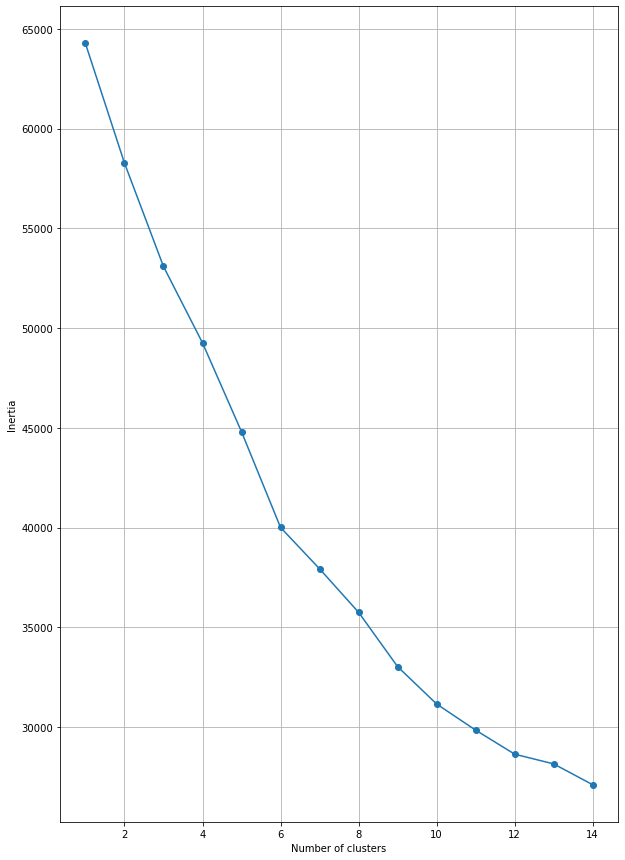

In [23]:
optimise_k_means(df5,15)

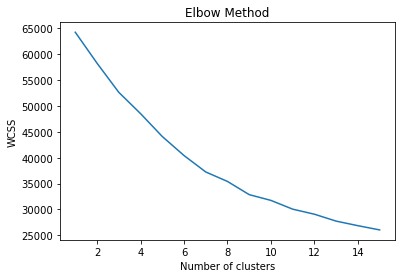

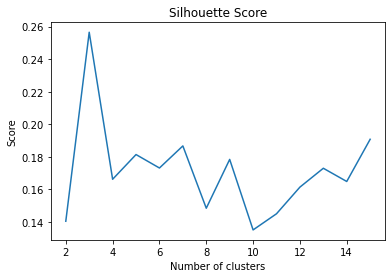

In [24]:
# Fit k-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df5)

# Elbow method
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df5)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette score
silhouette_scores = []
for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df5)
    silhouette_avg = silhouette_score(df5, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 16), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [25]:
df5 = pd.DataFrame(df5)

In [28]:
#creating multiple clusters 
for k in range(3,9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df5)
    df5[f'kMeans_{k}'] = kmeans.labels_

In [29]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
for k in range(3,9):
    # Calinski-Harabasz index
    ch_score_2 = calinski_harabasz_score(df5, df5[f'kMeans_{k}'])

    # Davies-Bouldin index
    db_score_2 = davies_bouldin_score(df5, df5[f'kMeans_{k}'])

    print(f'Indexes for number of clusters: {k} ')
    print(f'Calinski-Harabasz index: {ch_score_2}')
    print(f'Davies-Bouldin index: {db_score_2}')
    print('------------------------------------------')

Indexes for number of clusters: 3 
Calinski-Harabasz index: 969.8147017015192
Davies-Bouldin index: 1.3987131260127912
------------------------------------------
Indexes for number of clusters: 4 
Calinski-Harabasz index: 1198.0000770400422
Davies-Bouldin index: 1.264135362013849
------------------------------------------
Indexes for number of clusters: 5 
Calinski-Harabasz index: 1817.41313870077
Davies-Bouldin index: 1.08931281647351
------------------------------------------
Indexes for number of clusters: 6 
Calinski-Harabasz index: 1687.8728691215558
Davies-Bouldin index: 1.0131646289730734
------------------------------------------
Indexes for number of clusters: 7 
Calinski-Harabasz index: 2369.7496245407724
Davies-Bouldin index: 0.8260661082650156
------------------------------------------
Indexes for number of clusters: 8 
Calinski-Harabasz index: 2259.381502298135
Davies-Bouldin index: 0.8486125767522656
------------------------------------------


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a PCA model
pca = PCA(n_components=2)

Data plotttings for number of clusters: 3 


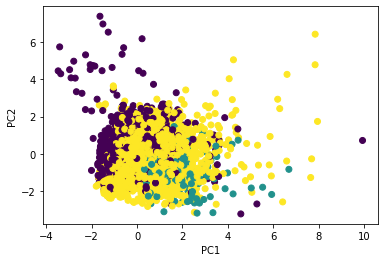

Data plotttings for number of clusters: 4 


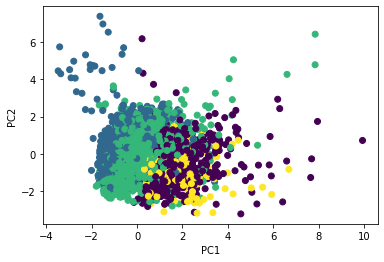

Data plotttings for number of clusters: 5 


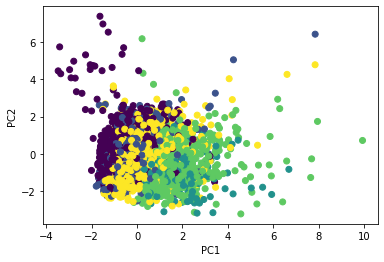

Data plotttings for number of clusters: 6 


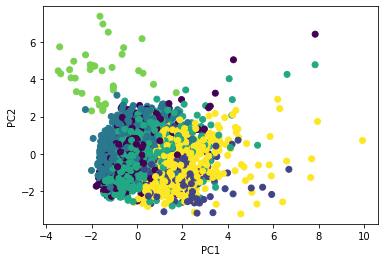

Data plotttings for number of clusters: 7 


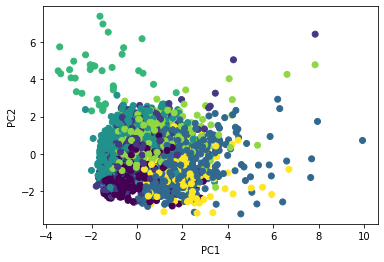

Data plotttings for number of clusters: 8 


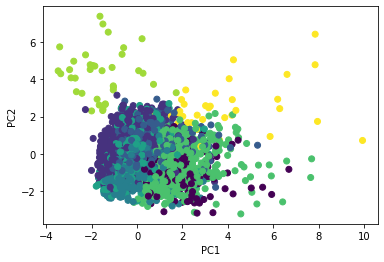

In [32]:
# Fit and transform the data to 2 dimensions
data_2d = pca.fit_transform(df5.iloc[:, 0:11])

for k in range(3,9):
    # Visualize the data using a scatter plot
    print(f'Data plotttings for number of clusters: {k} ')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=df5[f'kMeans_{k}'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

In [33]:
df5.head

<bound method NDFrame.head of         0         1         2         3         4         5         6  \
0     0.0  0.178216 -0.060729 -0.296917 -0.204251 -0.601141  1.341534   
1     0.0 -0.182310  0.580788 -0.192819 -0.204251 -0.601141  1.341534   
2     0.0  0.268347 -0.541867 -0.036674 -0.204251  1.663504  1.341534   
3     0.0  0.719005  4.670459  0.535861 -0.204251 -0.601141 -0.745416   
4     0.0 -0.452705 -0.541867  0.119472 -0.204251 -0.601141 -0.745416   
...   ...       ...       ...       ...       ...       ...       ...   
5838  0.0  0.118128 -0.541867 -0.505111 -0.204251 -0.601141 -0.745416   
5839  0.0 -0.332530  0.580788 -0.505111 -0.204251 -0.601141 -0.745416   
5840  0.0  0.418567  0.099650 -0.192819 -0.204251 -0.601141  1.341534   
5841  0.0 -0.287464 -0.060729  0.171521 -0.204251 -0.601141 -0.745416   
5842  0.0  0.043018  0.179840  0.744055 -0.204251  1.663504 -0.745416   

             7         8         9        10        11  kMeans_3  kMeans_4  \
0    -0.479695 

In [39]:
 df6 = scaler.fit_transform(df3)

In [41]:
df6 = pd.DataFrame(df6)

In [42]:
df6 = df6.iloc[:, 0:6]

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [46]:
#creating multiple clusters 
for k in range(3,9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df6)
    df6[f'kMeans_{k}'] = kmeans.labels_

In [47]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
for k in range(3,9):
    # Calinski-Harabasz index
    ch_score_2 = calinski_harabasz_score(df6, df6[f'kMeans_{k}'])

    # Davies-Bouldin index
    db_score_2 = davies_bouldin_score(df6, df6[f'kMeans_{k}'])

    print(f'Indexes for number of clusters: {k} ')
    print(f'Calinski-Harabasz index: {ch_score_2}')
    print(f'Davies-Bouldin index: {db_score_2}')
    print('------------------------------------------')

Indexes for number of clusters: 3 
Calinski-Harabasz index: 2418.0393449396006
Davies-Bouldin index: 0.8296706723676541
------------------------------------------
Indexes for number of clusters: 4 
Calinski-Harabasz index: 2053.979707987864
Davies-Bouldin index: 0.7090854226454774
------------------------------------------
Indexes for number of clusters: 5 
Calinski-Harabasz index: 1922.047220994058
Davies-Bouldin index: 0.66971936924102
------------------------------------------
Indexes for number of clusters: 6 
Calinski-Harabasz index: 3317.2137869146977
Davies-Bouldin index: 0.6414650408593638
------------------------------------------
Indexes for number of clusters: 7 
Calinski-Harabasz index: 4148.939798947943
Davies-Bouldin index: 0.5990207732276802
------------------------------------------
Indexes for number of clusters: 8 
Calinski-Harabasz index: 10513.062790414864
Davies-Bouldin index: 0.4269372811675161
------------------------------------------


Data plotttings for number of clusters: 3 


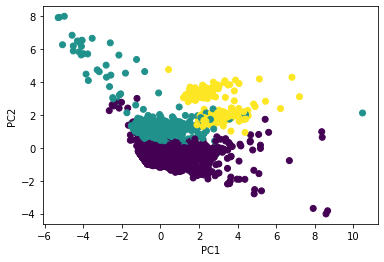

Data plotttings for number of clusters: 4 


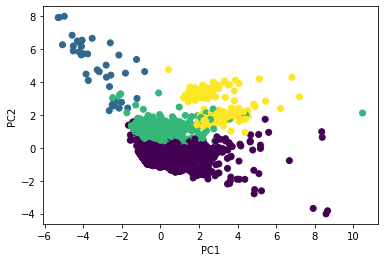

Data plotttings for number of clusters: 5 


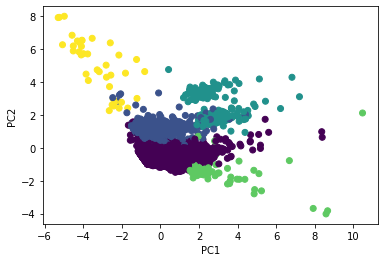

Data plotttings for number of clusters: 6 


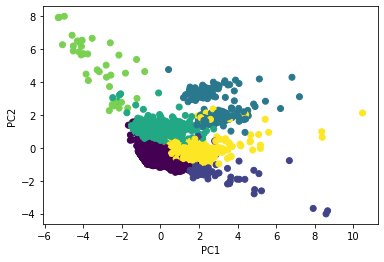

Data plotttings for number of clusters: 7 


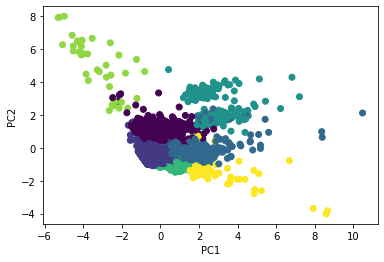

Data plotttings for number of clusters: 8 


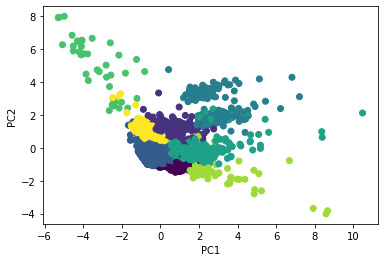

In [48]:
# Fit and transform the data to 2 dimensions
data_2d = pca.fit_transform(df6.iloc[:, 0:6])

for k in range(3,9):
    # Visualize the data using a scatter plot
    print(f'Data plotttings for number of clusters: {k} ')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=df6[f'kMeans_{k}'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

In [53]:
clusters=pd.DataFrame(df6,df6.columns)

In [54]:
clusters['label']=df6[f'kMeans_8']

In [58]:
 df7 = scaler.fit_transform(df3)

In [59]:
from sklearn.cluster import DBSCAN


dbscan_cluster_model = DBSCAN(eps=0.5, min_samples=100).fit(df7)
dbscan_cluster_model

DBSCAN(min_samples=100)

In [61]:
df7 = pd.DataFrame(df7)
df7 = df7.iloc[:, 0:6]

In [62]:
min_samples = np.arange(15, 100, step=10)

In [63]:
epsilons = np.linspace(0.01, 1, num=15)

In [64]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 15),
 (0.01, 25),
 (0.01, 35),
 (0.01, 45),
 (0.01, 55),
 (0.01, 65),
 (0.01, 75),
 (0.01, 85),
 (0.01, 95),
 (0.08071428571428571, 15),
 (0.08071428571428571, 25),
 (0.08071428571428571, 35),
 (0.08071428571428571, 45),
 (0.08071428571428571, 55),
 (0.08071428571428571, 65),
 (0.08071428571428571, 75),
 (0.08071428571428571, 85),
 (0.08071428571428571, 95),
 (0.15142857142857144, 15),
 (0.15142857142857144, 25),
 (0.15142857142857144, 35),
 (0.15142857142857144, 45),
 (0.15142857142857144, 55),
 (0.15142857142857144, 65),
 (0.15142857142857144, 75),
 (0.15142857142857144, 85),
 (0.15142857142857144, 95),
 (0.22214285714285714, 15),
 (0.22214285714285714, 25),
 (0.22214285714285714, 35),
 (0.22214285714285714, 45),
 (0.22214285714285714, 55),
 (0.22214285714285714, 65),
 (0.22214285714285714, 75),
 (0.22214285714285714, 85),
 (0.22214285714285714, 95),
 (0.29285714285714287, 15),
 (0.29285714285714287, 25),
 (0.29285714285714287, 35),
 (0.29285714285714287, 45),
 (0.29285714285

In [66]:
N = len(combinations)

In [68]:
from sklearn.metrics import silhouette_score as ss

In [69]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 5) or (num_clusters > 25):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, df7)

Combination (0.01, 15) on iteration 1 of 135 has 3 clusters. Moving on
Combination (0.01, 25) on iteration 2 of 135 has 1 clusters. Moving on
Combination (0.01, 35) on iteration 3 of 135 has 0 clusters. Moving on
Combination (0.01, 45) on iteration 4 of 135 has 0 clusters. Moving on
Combination (0.01, 55) on iteration 5 of 135 has 0 clusters. Moving on
Combination (0.01, 65) on iteration 6 of 135 has 0 clusters. Moving on
Combination (0.01, 75) on iteration 7 of 135 has 0 clusters. Moving on
Combination (0.01, 85) on iteration 8 of 135 has 0 clusters. Moving on
Combination (0.01, 95) on iteration 9 of 135 has 0 clusters. Moving on
Index: 9, Score: -0.44692219979325265, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 24
Index: 10, Score: -0.3702464915916657, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 7
Combination (0.08071428571428571, 35) on iteration 12 of 135 has 4 clusters. Moving on
Combination (0.08071428571428571, 45) on iteration 13 of 135 has 3 clusters. Moving on
Combination 

Combination (0.7171428571428572, 95) on iteration 99 of 135 has 2 clusters. Moving on
Combination (0.7878571428571429, 15) on iteration 100 of 135 has 4 clusters. Moving on
Combination (0.7878571428571429, 25) on iteration 101 of 135 has 4 clusters. Moving on
Combination (0.7878571428571429, 35) on iteration 102 of 135 has 3 clusters. Moving on
Combination (0.7878571428571429, 45) on iteration 103 of 135 has 3 clusters. Moving on
Combination (0.7878571428571429, 55) on iteration 104 of 135 has 3 clusters. Moving on
Combination (0.7878571428571429, 65) on iteration 105 of 135 has 3 clusters. Moving on
Combination (0.7878571428571429, 75) on iteration 106 of 135 has 2 clusters. Moving on
Combination (0.7878571428571429, 85) on iteration 107 of 135 has 2 clusters. Moving on
Combination (0.7878571428571429, 95) on iteration 108 of 135 has 2 clusters. Moving on
Index: 108, Score: 0.49315403154062315, Labels: [0 0 1 ... 0 0 1], NumClusters: 5
Combination (0.8585714285714285, 25) on iteration

In [70]:
best_dict

{'best_epsilon': 0.9292857142857143,
 'best_min_samples': 15,
 'best_labels': array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 'best_score': 0.49501685643390436}

In [71]:
df7['cluster'] = best_dict['best_labels']

In [72]:
df7['cluster'].value_counts()

 0    4030
 1    1425
-1     155
 2     140
 3      76
 4      17
Name: cluster, dtype: int64

In [73]:
import matplotlib.pyplot as px

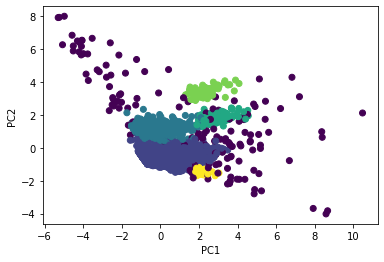

In [74]:
# Fit and transform the data to 2 dimensions
data_2d = pca.fit_transform(df7.iloc[:, 0:6])



plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=df7['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [75]:
ch_score_dataDBSCAN1 = calinski_harabasz_score(df7, df7['cluster'])
db_score_dataDBSCAN1 = davies_bouldin_score(df7, df7['cluster'])

print(f'Calinski-Harabasz index: {ch_score_dataDBSCAN1}')
print(f'Davies-Bouldin index: {db_score_dataDBSCAN1}')
print('------------------------------------------')

Calinski-Harabasz index: 1347.1338509910368
Davies-Bouldin index: 1.3083669020142452
------------------------------------------


In [76]:
 df8 = scaler.fit_transform(df3)

In [79]:
df8 = pd.DataFrame(df8)

In [80]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler



# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5)  # Set the desired number of clusters

# Fit the data and obtain the cluster labels
cluster_labels = clustering.fit_predict(df8)

# Add the cluster labels to the original data frame
df8['cluster_label'] = cluster_labels

# Print the resulting data frame with cluster labels
print(df8)


        0         1         2         3         4         5         6  \
0     0.0  0.178216 -0.060729 -0.296917 -0.204251 -0.601141  1.341534   
1     0.0 -0.182310  0.580788 -0.192819 -0.204251 -0.601141  1.341534   
2     0.0  0.268347 -0.541867 -0.036674 -0.204251  1.663504  1.341534   
3     0.0  0.719005  4.670459  0.535861 -0.204251 -0.601141 -0.745416   
4     0.0 -0.452705 -0.541867  0.119472 -0.204251 -0.601141 -0.745416   
...   ...       ...       ...       ...       ...       ...       ...   
5838  0.0  0.118128 -0.541867 -0.505111 -0.204251 -0.601141 -0.745416   
5839  0.0 -0.332530  0.580788 -0.505111 -0.204251 -0.601141 -0.745416   
5840  0.0  0.418567  0.099650 -0.192819 -0.204251 -0.601141  1.341534   
5841  0.0 -0.287464 -0.060729  0.171521 -0.204251 -0.601141 -0.745416   
5842  0.0  0.043018  0.179840  0.744055 -0.204251  1.663504 -0.745416   

             7         8         9        10        11  cluster_label  
0    -0.479695 -0.130638 -0.366468 -0.278136 -0.069

In [82]:
ch_score_dataDBSCAN1 = calinski_harabasz_score(df8, df8['cluster_label'])
db_score_dataDBSCAN1 = davies_bouldin_score(df8, df8['cluster_label'])

print(f'Calinski-Harabasz index: {ch_score_dataDBSCAN1}')
print(f'Davies-Bouldin index: {db_score_dataDBSCAN1}')
print('------------------------------------------')

Calinski-Harabasz index: 992.0188781251447
Davies-Bouldin index: 1.3734860017289006
------------------------------------------


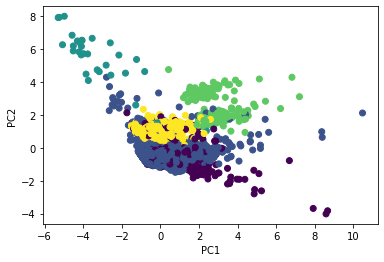

In [83]:
data_2d = pca.fit_transform(df8.iloc[:, 0:6])



plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=df8['cluster_label'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [84]:
df9 = scaler.fit_transform(df3)

In [86]:
df9 = pd.DataFrame(df9)
df9 = df9.iloc[:, 0:6]

In [91]:
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5)  # Set the desired number of clusters

# Fit the data and obtain the cluster labels
cluster_labels = clustering.fit_predict(df9)

# Add the cluster labels to the original data frame
df9['cluster_label'] = cluster_labels

# Print the resulting data frame with cluster labels
print(df9)

        0         1         2         3         4         5  cluster_label
0     0.0  0.178216 -0.060729 -0.296917 -0.204251 -0.601141              0
1     0.0 -0.182310  0.580788 -0.192819 -0.204251 -0.601141              0
2     0.0  0.268347 -0.541867 -0.036674 -0.204251  1.663504              2
3     0.0  0.719005  4.670459  0.535861 -0.204251 -0.601141              0
4     0.0 -0.452705 -0.541867  0.119472 -0.204251 -0.601141              0
...   ...       ...       ...       ...       ...       ...            ...
5838  0.0  0.118128 -0.541867 -0.505111 -0.204251 -0.601141              0
5839  0.0 -0.332530  0.580788 -0.505111 -0.204251 -0.601141              0
5840  0.0  0.418567  0.099650 -0.192819 -0.204251 -0.601141              0
5841  0.0 -0.287464 -0.060729  0.171521 -0.204251 -0.601141              0
5842  0.0  0.043018  0.179840  0.744055 -0.204251  1.663504              2

[5843 rows x 7 columns]


In [92]:
ch_score_dataDBSCAN1 = calinski_harabasz_score(df9, df9['cluster_label'])
db_score_dataDBSCAN1 = davies_bouldin_score(df9, df9['cluster_label'])

print(f'Calinski-Harabasz index: {ch_score_dataDBSCAN1}')
print(f'Davies-Bouldin index: {db_score_dataDBSCAN1}')
print('------------------------------------------')

Calinski-Harabasz index: 3255.6833500408507
Davies-Bouldin index: 0.5643581087913002
------------------------------------------


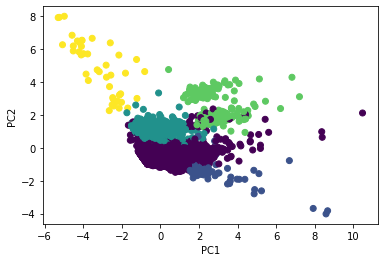

In [93]:
data_2d = pca.fit_transform(df9.iloc[:, 0:6])



plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=df9['cluster_label'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()